In [127]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import jieba
from collections import Counter

In [128]:
url = 'https://www.cakeresume.com/jobs?location_list%5B0%5D=Taiwan'  # cakeresumeÊâæÂ∑•‰Ωú
response = requests.get(url)

In [129]:
if response.status_code == 200:
  soup = BeautifulSoup(response.text, 'html.parser')

In [130]:
response.status_code

200

In [131]:
#ÂâµÂª∫‰∏ÄÂÄãÁ©∫ÁöÑÂàóË°®ÔºåÁî®‰æÜÊö´Â≠òÂ∑•‰ΩúË≥áÊñô
job_data_list = []

def get_job_data(page_number):
    url = f"https://www.cakeresume.com/jobs?location_list%5B0%5D=Taiwan&page={page_number}"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        # Âú®ÈÄôË£°Ëß£ÊûêÁ∂≤È†ÅË≥áÊñôÔºåÊèêÂèñ‰Ω†ÈúÄË¶ÅÁöÑÂÖßÂÆπ
        # ‰æãÂ¶ÇÔºåÂ¶ÇÊûú‰Ω†Ë¶ÅÊâæÂà∞ÊâÄÊúâÂ∑•‰ΩúÁöÑÊ®ôÈ°åÔºåÂèØ‰ª•‰ΩøÁî®‰∏ãÈù¢ÁöÑÁ®ãÂºèÁ¢ºÔºö
        job_info = soup.find_all('div', class_='JobSearchItem_headerTitle__CuE3V')
        for job in job_info:
            job_title = job.text.strip()  
            job_data_list.append(job_title)  # Â∞áÂ∑•‰ΩúË≥áÊñôÂä†ÂÖ•ÂàóË°®‰∏≠
            print(job.text)

    else:
        print(f"Failed to retrieve page {page_number}.")

# Ë¶ÅÁç≤ÂèñÁöÑÈ†ÅÊï∏ÁØÑÂúç
start_page = 1
end_page = 1  # ‰æãÂ¶ÇÔºå‰Ω†ÊÉ≥Ë¶ÅÁà¨ÂèñÂæûÁ¨¨1È†ÅÂà∞Á¨¨5È†ÅÁöÑË≥áÊñô

for page_number in range(start_page, end_page + 1):
    print(f"\n Â∑•‰ΩúÂÖßÂÆπ from page {page_number}...")
    get_job_data(page_number)


 Â∑•‰ΩúÂÖßÂÆπ from page 1...
ÁâπÂäõÈõÜÂúò 2024 Green ProgramÊãõÂãüË®àÁï´ (5/12 ÊäïÈÅûÊà™Ê≠¢)
ü™ê2024 ‰ø°Áæ©ÊàøÂ±ãÁ∂ìÁáüÁÆ°ÁêÜÂÑ≤ÂÇôÂππÈÉ®(MA)ü™ê4/30Êà™Ê≠¢Êî∂‰ª∂
2024 WorldQuant IQC ÂÖ®ÁêÉÈáèÂåñÈáëËûçÁ†îÁ©∂Èå¶Ê®ôË≥Ω
„Äê10.9 Ëê¨ÂØ¶‰ΩúÁçéÂãµÈáëÔºå‰∏çÈôêÂπ¥ÈΩ°Á∂ìÈ©ó„Äë 2024 T Â§ß‰ΩøË®àÁï´ÔΩúÁ¨¨‰∫åÊ¢ØÊ¨°ÈñãË∑ëÔºÅÂª∂Èï∑Â†±ÂêçËá≥ 05/24 Êà™Ê≠¢
ÁâπÂäõÈõÜÂúò 2024 Green Program-Ë®≠Ë®àÈ°û ÊãõÂãüË®àÁï´ (5/12 ÊäïÈÅûÊà™Ê≠¢)
„Äê‰∫ûÈ¶¨ÈÅúAmazon„ÄëÈõªÂïÜÂ∞àÊ°àÁÆ°ÁêÜÂ∏´ Amazon Project Manager
ÈõªÂïÜË≥áÊñôÂàÜÊûê
@cosme „ÄêBeauty x IT ÂΩ±ÈüøÂäõ‰∫∫ÊâçË®àÁï´„Äë ÂÑ≤ÂÇôÂππÈÉ®(MA)ÊãõÂãü 2024
„Äê@cosme„ÄëÁæéÂ¶ùÂπ≥Âè∞/Á§æÁæ§Á∂ìÁáü‰ºÅÂäÉ
„Äê518ÁÜäÁè≠„ÄëÁî¢ÂìÅË®≠Ë®àÂ∏´ Product Designer


In [132]:
#ÂâµÂª∫‰∏ÄÂÄãÁ©∫ÁöÑÂàóË°®ÔºåÁî®‰æÜÊö´Â≠òËñ™Ë≥áË≥áÊñô
salary_data_list = []

def get_job_data(page_number):
    url = f"https://www.cakeresume.com/jobs?location_list%5B0%5D=Taiwan&page={page_number}"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        # Âú®ÈÄôË£°Ëß£ÊûêÁ∂≤È†ÅË≥áÊñôÔºåÊèêÂèñ‰Ω†ÈúÄË¶ÅÁöÑÂÖßÂÆπ
        # ‰æãÂ¶ÇÔºåÂ¶ÇÊûú‰Ω†Ë¶ÅÊâæÂà∞ÊâÄÊúâÂ∑•‰ΩúÁöÑÊ®ôÈ°åÔºåÂèØ‰ª•‰ΩøÁî®‰∏ãÈù¢ÁöÑÁ®ãÂºèÁ¢ºÔºö
        salary_info = soup.find_all('div', class_='InlineMessage_label__LJGjW')
        for salary in salary_info:
            salary_info = re.findall(r'NT| \b\d{3,} |\d+[Ëê¨|]', salary.text)
            salary_text = salary.text.strip()
            if salary_info:
                print(salary.text)
                salary_data_list.append(salary.text)
    else:
        print(f"Failed to retrieve page {page_number}.")

# Ë¶ÅÁç≤ÂèñÁöÑÈ†ÅÊï∏ÁØÑÂúç
start_page = 1
end_page = 1  # ‰æãÂ¶ÇÔºå‰Ω†ÊÉ≥Ë¶ÅÁà¨ÂèñÂæûÁ¨¨1È†ÅÂà∞Á¨¨5È†ÅÁöÑË≥áÊñô

for page_number in range(start_page, end_page + 1):
    print(f"\n Ëñ™Ë≥á from page {page_number}...")
    get_job_data(page_number)


 Ëñ™Ë≥á from page 1...
4.2Ëê¨ ~ 5.2Ëê¨ TWD / Êúà
120Ëê¨ ~ 150Ëê¨ TWD / Âπ¥
1000 ~ 2Ëê¨ USD / Êåâ‰ª∂Ë®àÈÖ¨
10.9Ëê¨ ~ 10.9Ëê¨ TWD / Êåâ‰ª∂Ë®àÈÖ¨
4.2Ëê¨ ~ 5.2Ëê¨ TWD / Êúà
5Ëê¨ ~ 6Ëê¨ TWD / Êúà
5Ëê¨ ~ 6Ëê¨ TWD / Êúà
4.5Ëê¨ ~ 5.5Ëê¨ TWD / Êúà
3.5Ëê¨ ~ 5Ëê¨ TWD / Êúà
5Ëê¨ ~ 5.5Ëê¨ TWD / Êúà


In [133]:
#ÂâµÂª∫‰∏ÄÂÄãÁ©∫ÁöÑÂàóË°®ÔºåÁî®‰æÜÊö´Â≠òÂ∑•‰ΩúË≥áÊñô
job_data_description = []

def get_job_data(page_number):
    url = f"https://www.cakeresume.com/jobs?location_list%5B0%5D=Taiwan&page={page_number}"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        # Âú®ÈÄôË£°Ëß£ÊûêÁ∂≤È†ÅË≥áÊñôÔºåÊèêÂèñ‰Ω†ÈúÄË¶ÅÁöÑÂÖßÂÆπ
        # ‰æãÂ¶ÇÔºåÂ¶ÇÊûú‰Ω†Ë¶ÅÊâæÂà∞ÊâÄÊúâÂ∑•‰ΩúÁöÑÊ®ôÈ°åÔºåÂèØ‰ª•‰ΩøÁî®‰∏ãÈù¢ÁöÑÁ®ãÂºèÁ¢ºÔºö
        job_info = soup.find_all('div', class_='JobSearchItem_description__si5zg')
        for job in job_info:
            job_title = job.text.strip()  
            job_data_description.append(job_title)  # Â∞áÂ∑•‰ΩúË≥áÊñôÂä†ÂÖ•ÂàóË°®‰∏≠
            print(job.text)

    else:
        print(f"Failed to retrieve page {page_number}.")

# Ë¶ÅÁç≤ÂèñÁöÑÈ†ÅÊï∏ÁØÑÂúç
start_page = 1
end_page = 1  # ‰æãÂ¶ÇÔºå‰Ω†ÊÉ≥Ë¶ÅÁà¨ÂèñÂæûÁ¨¨1È†ÅÂà∞Á¨¨5È†ÅÁöÑË≥áÊñô

for page_number in range(start_page, end_page + 1):
    print(f"\n Â∑•‰ΩúÂÖßÂÆπ from page {page_number}...")
    get_job_data(page_number)


 Â∑•‰ΩúÂÖßÂÆπ from page 1...
ÁâπÂäõÈõÜÂúòÁÇ∫Á§æÊúÉÊñ∞ÈÆÆ‰∫∫ÈáèË∫´ÊâìÈÄ†ÁöÑ„ÄåGREEN PROGRAM„ÄçÔºåÈÄèÈÅéÂÆåÊï¥ÁöÑÂ≠∏ÁøíÁôºÂ±ïËóçÂúñÔºåÊâéÂØ¶ÁöÑÂ∑•‰ΩúÊ≠∑Á∑¥Ëàá‰ªªÂãôÊåëÊà∞ÔºåÊ∑±ËÄïÈõ∂ÂîÆÁî¢Ê•≠„ÄÇÂ∏∂È†ò‰Ω†ÂØ¶Ë∏êÂâµÊÑè„ÄÅÈÇÅÂêëÂçìË∂äÔºåÊàêÁÇ∫ÂÖ∑ÂÇôÂúãÈöõË¶ñÈáéÁöÑÂÖ®Êñπ‰ΩçÂ∞àÊ•≠‰∫∫Êâç „ÄÇ ‚òÖIDP 2.5Âπ¥ÁöÑÂ∞à
‰ø°Áæ©ÊàøÂ±ãÂ∏åÊúõÂ±Ö‰ΩèÂú®ÈÄôÁâáÂúüÂú∞‰∏äÁöÑ‰∫∫ÂÄëÔºåÂú®„Äå‰∏çÂãïÁî¢‰∫§ÊòìË≤∑Ë≥£„ÄçËàá„ÄåÂ±Ö‰ΩèÁîüÊ¥ªÊó•Â∏∏„ÄçÊñπÈù¢ÊúâÊõ¥Â•ΩÁöÑ‰øùÈöúËàáÈ´îÈ©óÔºÅÊúüÂæÖ‰Ω†Ëàá‰ø°Áæ©ÊàøÂ±ã ‰∏ÄËµ∑ÔºåÂä†ÈÄüÈÄôÂÄãÊîπËÆäüöÄ „Äê ‰ø°Áæ©ÊàøÂ±ã ÔΩúÁ∂ìÁáüÁÆ°ÁêÜÂÑ≤ÂÇôÂππÈÉ® üè†„ÄëLight Up Your FutureÔºÅ ‰ø°Áæ©‰ºÅ
Ê∫ñÂÇôÂ•ΩÊàêÁÇ∫‰∏ã‰∏ÄÂÄãÈáèÂåñÈáëËûçÁ†îÁ©∂Ë¥èÂÆ∂‰∫ÜÂóéÔºü Â†±ÂêçÂ∞áÊñº 5 Êúà 15 Êó•Êà™Ê≠¢ÔºÅ Êé¢Á¥¢ÈáèÂåñÈáëËûçÁöÑ‰∏ñÁïå‰∏¶ÂèÉËàáÁî± WorldQuant BRAIN ÊâÄËàâËæ¶ÁöÑ 2024 International Quant Championship (ÂÖ®ÁêÉÈáèÂåñÈáëËûçÁ†îÁ©∂Èå¶Ê®ôË≥Ω) ‚Äî ÊàëÂÄëÁöÑÊóóËâ¶ÂûãÁ´∂Ë≥ΩÔºåÂèñÂæó‰ª£Ë°®ÊÇ®ÊâÄÂú®ÂúãÂÆ∂/
Âõ†ÊáâÊï∏‰ΩçÁ∂ìÊøüËàá AI ËààËµ∑ÔºåÊîøÂ∫úÊé®Âãï„ÄåÊï∏‰ΩçÈùíÂπ¥ T Â§ß‰ΩøÊé®ÂãïË®àÁï´„ÄçÔºåÈáùÂ∞çÊú™‰æÜÊâÄÈúÄ‰∫

In [134]:
job_data_description_keywords = []
def tokenize(text):
    # ‰ΩøÁî®Á≤æÁ¢∫Ê®°ÂºèÂàÜË©û
    words = jieba.cut(text, cut_all=False)
    # ËøîÂõûÂàÜË©ûÁµêÊûú
    return list(words)

def extract_keywords(tokens):
    # ÈÅéÊøæÁ©∫ÁôΩÂ≠óÁ¨¶
    tokens = [token for token in tokens if token.strip()]
    # ‰ΩøÁî® Counter Áµ±Ë®àË©ûÈ†ª
    word_counts = Counter(tokens)
    # ÊèêÂèñÂâçÂçÅÂÄãË©ûÈ†ªÊúÄÈ´òÁöÑË©û
    top_keywords = word_counts.most_common(10)
    # ËøîÂõûÂâçÂçÅÂÄãÈóúÈçµÂ≠ó
    return [keyword[0] for keyword in top_keywords]
   
    # ÈÅçÊ≠∑ÂàóË°®‰∏¶ÂàÜË©û
for job_data in job_data_description:
    # Ê∏ÖÁêÜÂ∑•‰Ωú‰ªãÁ¥πÊñáÊú¨ÔºåÂè™‰øùÁïô‰∏≠Êñá„ÄÅËã±ÊñáÂíåÊï∏Â≠ó
    cleaned_description = clean_text(job_data)
    # ÂàÜË©û
    tokens = tokenize(cleaned_description)
    # ÊèêÂèñÈóúÈçµÂ≠ó
    keywords = extract_keywords(tokens)
    # Ëº∏Âá∫ÈóúÈçµÂ≠ó
    print(keywords)
    
    job_data_description_keywords.append(' '.join(keywords))


['ÁöÑ', 'ÁâπÂäõ', 'ÈõÜÂúò', 'ÁÇ∫', 'Á§æÊúÉ', 'Êñ∞ÈÆÆ‰∫∫', 'ÈáèË∫´', 'ÊâìÈÄ†', 'GREEN', 'PROGRAM']
['‰ø°Áæ©', 'ÊàøÂ±ã', 'Ëàá', 'Â±Ö‰Ωè', 'Âú®', 'ÁöÑ', 'Â∏åÊúõ', 'ÈÄôÁâá', 'ÂúüÂú∞', '‰∏ä']
['ÈáèÂåñ', 'ÈáëËûç', 'ÁöÑ', 'Á†îÁ©∂', 'Ê∫ñÂÇô', 'Â•Ω', 'ÊàêÁÇ∫', '‰∏ã', '‰∏ÄÂÄã', 'Ë¥èÂÆ∂']
['Ëàá', 'Êï∏‰Ωç', 'Êé®Âãï', 'ÈùíÂπ¥', 'Âõ†Êáâ', 'Á∂ìÊøü', 'AI', 'ËààËµ∑', 'ÊîøÂ∫ú', 'T']
['ÁöÑ', 'ÁâπÂäõ', 'ÈõÜÂúò', 'ÁÇ∫', 'Á§æÊúÉ', 'Êñ∞ÈÆÆ‰∫∫', 'ÈáèË∫´', 'ÊâìÈÄ†', 'GREEN', 'PROGRAM']
['Âú®', 'Hour', 'Loop', 'È£õËº™', 'ÈõªÂïÜ', '2013', 'Âπ¥', 'ÊàêÁ´ã', '‰∏¶', 'Êñº']
['Âú®', 'Hour', 'Loop', 'È£õËº™', 'ÈõªÂïÜ', '2013', 'Âπ¥', 'ÊàêÁ´ã', '‰∏¶', 'Êñº']
['i', '-', 'TRUE', 'Êó•Êú¨', 'cosme', 'Beauty', 'ÈÅãÁáü', '20', 'Âπ¥‰æÜ', 'Ë∫´ÁÇ∫']
['cosme', 'Âπ¥', 'Âú®', 'Êó•Êú¨', 'Taiwan', 'ÂâçË∫´', 'UrCosme', '2004', 'ÂâµÂª∫', 'Âè∞']
['518', 'ÁßëÊäÄ', 'ÁÜäÁè≠', 'ÁöÑ', 'ÁôºÈü≥', 'Êï∏Â≠ó', 'Êóó‰∏ã', 'Á´ôÂè∞', 'ÊòØ', '‰∫∫Âäõ']


In [135]:
if len(job_data_list) == len(salary_data_list) ==len(job_data_description) ==len(job_data_description_keywords):
    # ‰ΩøÁî® zip() ÂáΩÊï∏Â∞á‰∏âÂÄãÂàóË°®Âêà‰Ωµ
    combined_data = list(zip(job_data_list, salary_data_list, job_data_description, job_data_description_keywords))
    
    # ÂâµÂª∫ DataFrameÔºå‰∏¶ÊåáÂÆöÊ¨Ñ‰ΩçÂêçÁ®±
    df = pd.DataFrame(combined_data, columns=['Â∑•‰Ωú', 'Ëñ™Ë≥á', '‰ªãÁ¥π', 'ÈóúÈçµË©û'])
    
    # È°ØÁ§∫ DataFrame
    print(df.head())
else:
    print("Error: ‰∏âÂÄãÂàóË°®ÁöÑÈï∑Â∫¶‰∏çÂêåÔºåÁÑ°Ê≥ïÂêà‰Ωµ„ÄÇ")

                                                  Â∑•‰Ωú  \
0            ÁâπÂäõÈõÜÂúò 2024 Green ProgramÊãõÂãüË®àÁï´ (5/12 ÊäïÈÅûÊà™Ê≠¢)   
1                    ü™ê2024 ‰ø°Áæ©ÊàøÂ±ãÁ∂ìÁáüÁÆ°ÁêÜÂÑ≤ÂÇôÂππÈÉ®(MA)ü™ê4/30Êà™Ê≠¢Êî∂‰ª∂   
2                    2024 WorldQuant IQC ÂÖ®ÁêÉÈáèÂåñÈáëËûçÁ†îÁ©∂Èå¶Ê®ôË≥Ω   
3  „Äê10.9 Ëê¨ÂØ¶‰ΩúÁçéÂãµÈáëÔºå‰∏çÈôêÂπ¥ÈΩ°Á∂ìÈ©ó„Äë 2024 T Â§ß‰ΩøË®àÁï´ÔΩúÁ¨¨‰∫åÊ¢ØÊ¨°ÈñãË∑ëÔºÅÂª∂Èï∑Â†±ÂêçËá≥ ...   
4       ÁâπÂäõÈõÜÂúò 2024 Green Program-Ë®≠Ë®àÈ°û ÊãõÂãüË®àÁï´ (5/12 ÊäïÈÅûÊà™Ê≠¢)   

                         Ëñ™Ë≥á  \
0       4.2Ëê¨ ~ 5.2Ëê¨ TWD / Êúà   
1       120Ëê¨ ~ 150Ëê¨ TWD / Âπ¥   
2      1000 ~ 2Ëê¨ USD / Êåâ‰ª∂Ë®àÈÖ¨   
3  10.9Ëê¨ ~ 10.9Ëê¨ TWD / Êåâ‰ª∂Ë®àÈÖ¨   
4       4.2Ëê¨ ~ 5.2Ëê¨ TWD / Êúà   

                                                  ‰ªãÁ¥π  \
0  ÁâπÂäõÈõÜÂúòÁÇ∫Á§æÊúÉÊñ∞ÈÆÆ‰∫∫ÈáèË∫´ÊâìÈÄ†ÁöÑ„ÄåGREEN PROGRAM„ÄçÔºåÈÄèÈÅéÂÆåÊï¥ÁöÑÂ≠∏ÁøíÁôºÂ±ïËóçÂúñÔºåÊâéÂØ¶ÁöÑ...   
1  ‰ø°Áæ©ÊàøÂ±ãÂ∏åÊúõÂ±Ö‰ΩèÂú®ÈÄôÁâáÂúüÂú∞‰∏äÁöÑ‰∫∫ÂÄëÔºåÂú®„Äå‰∏çÂã

In [136]:
df

Â∑•‰Ωú  \
0            ÁâπÂäõÈõÜÂúò 2024 Green ProgramÊãõÂãüË®àÁï´ (5/12 ÊäïÈÅûÊà™Ê≠¢)   
1                    ü™ê2024 ‰ø°Áæ©ÊàøÂ±ãÁ∂ìÁáüÁÆ°ÁêÜÂÑ≤ÂÇôÂππÈÉ®(MA)ü™ê4/30Êà™Ê≠¢Êî∂‰ª∂   
2                    2024 WorldQuant IQC ÂÖ®ÁêÉÈáèÂåñÈáëËûçÁ†îÁ©∂Èå¶Ê®ôË≥Ω   
3  „Äê10.9 Ëê¨ÂØ¶‰ΩúÁçéÂãµÈáëÔºå‰∏çÈôêÂπ¥ÈΩ°Á∂ìÈ©ó„Äë 2024 T Â§ß‰ΩøË®àÁï´ÔΩúÁ¨¨‰∫åÊ¢ØÊ¨°ÈñãË∑ëÔºÅÂª∂Èï∑Â†±ÂêçËá≥ ...   
4       ÁâπÂäõÈõÜÂúò 2024 Green Program-Ë®≠Ë®àÈ°û ÊãõÂãüË®àÁï´ (5/12 ÊäïÈÅûÊà™Ê≠¢)   
5          „Äê‰∫ûÈ¶¨ÈÅúAmazon„ÄëÈõªÂïÜÂ∞àÊ°àÁÆ°ÁêÜÂ∏´ Amazon Project Manager   
6                                             ÈõªÂïÜË≥áÊñôÂàÜÊûê   
7       @cosme „ÄêBeauty x IT ÂΩ±ÈüøÂäõ‰∫∫ÊâçË®àÁï´„Äë ÂÑ≤ÂÇôÂππÈÉ®(MA)ÊãõÂãü 2024   
8                                „Äê@cosme„ÄëÁæéÂ¶ùÂπ≥Âè∞/Á§æÁæ§Á∂ìÁáü‰ºÅÂäÉ   
9                      „Äê518ÁÜäÁè≠„ÄëÁî¢ÂìÅË®≠Ë®àÂ∏´ Product Designer   

                         Ëñ™Ë≥á  \
0       4.2Ëê¨ ~ 5.2Ëê¨ TWD / Êúà   
1       120Ëê¨ ~ 150Ëê¨ TWD / Âπ¥   
2      1000 ~ 2Ëê¨ USD / Êåâ‰ª∂Ë®àÈÖ¨   
3  10.9Ëê¨ ~ 10.9Ëê¨ TWD / Êåâ‰ª∂Ë®àÈÖ¨   
4       4.2Ëê¨ ~ 5.2Ëê¨ TWD / Êúà   
5           5Ëê¨ ~ 6Ëê¨ TWD / Êúà   
6           5Ëê¨ ~ 6Ëê¨ TWD / Êúà   
7       4.5Ëê¨ ~ 5.5Ëê¨ TWD / Êúà   
8         3.5Ëê¨ ~ 5Ëê¨ TWD / Êúà   
9         5Ëê¨ ~ 5.5Ëê¨ TWD / Êúà   

                                                  ‰ªãÁ¥π  \
0  ÁâπÂäõÈõÜÂúòÁÇ∫Á§æÊúÉÊñ∞ÈÆÆ‰∫∫ÈáèË∫´ÊâìÈÄ†ÁöÑ„ÄåGREEN PROGRAM„ÄçÔºåÈÄèÈÅéÂÆåÊï¥ÁöÑÂ≠∏ÁøíÁôºÂ±ïËóçÂúñÔºåÊâéÂØ¶ÁöÑ...   
1  ‰ø°Áæ©ÊàøÂ±ãÂ∏åÊúõÂ±Ö‰ΩèÂú®ÈÄôÁâáÂúüÂú∞‰∏äÁöÑ‰∫∫ÂÄëÔºåÂú®„Äå‰∏çÂãïÁî¢‰∫§ÊòìË≤∑Ë≥£„ÄçËàá„ÄåÂ±Ö‰ΩèÁîüÊ¥ªÊó•Â∏∏„ÄçÊñπÈù¢ÊúâÊõ¥Â•ΩÁöÑ‰øùÈöúËàá...   
2  Ê∫ñÂÇôÂ•ΩÊàêÁÇ∫‰∏ã‰∏ÄÂÄãÈáèÂåñÈáëËûçÁ†îÁ©∂Ë¥èÂÆ∂‰∫ÜÂóéÔºü Â†±ÂêçÂ∞áÊñº 5 Êúà 15 Êó•Êà™Ê≠¢ÔºÅ Êé¢Á¥¢ÈáèÂåñÈáëËûçÁöÑ‰∏ñÁïå...   
3  Âõ†ÊáâÊï∏‰ΩçÁ∂ìÊøüËàá AI ËààËµ∑ÔºåÊîøÂ∫úÊé®Âãï„ÄåÊï∏‰ΩçÈùíÂπ¥ T Â§ß‰ΩøÊé®ÂãïË®àÁï´„ÄçÔºåÈáùÂ∞çÊú™‰æÜÊâÄÈúÄ‰∫∫ÊâçÊèêÂâçÂ∏ÉÂ±Ä...   
4  ÁâπÂäõÈõÜÂúòÁÇ∫Á§æÊúÉÊñ∞ÈÆÆ‰∫∫ÈáèË∫´ÊâìÈÄ†ÁöÑ„ÄåGREEN PROGRAM„ÄçÔºåÈÄèÈÅéÂÆåÊï¥ÁöÑÂ≠∏ÁøíÁôºÂ±ïËóçÂúñÔºåÊâéÂØ¶ÁöÑ...   
5  „ÄêHour Loop È£õËº™ÈõªÂïÜ„ÄëÂú®2013Âπ¥ÊàêÁ´ãÔºå‰∏¶Êñº2022Âπ¥ÂàùÂú®ÁæéÂúãÈÇ£ÊñØÈÅîÂÖã‰∏äÂ∏Ç„ÄÇ‰ΩúÁÇ∫‰∫û...   
6  „ÄêHour Loop È£õËº™ÈõªÂïÜ„ÄëÂú®2013Âπ¥ÊàêÁ´ãÔºå‰∏¶Êñº2022Âπ¥ÂàùÂú®ÁæéÂúãÈÇ£ÊñØÈÅîÂÖã‰∏äÂ∏Ç„ÄÇ‰ΩúÁÇ∫‰∫û...   
7  i-TRUEÈÅãÁáü20Âπ¥‰æÜÔºåË∫´ÁÇ∫„ÄåÊó•Êú¨NO.1ÁæéÂ¶ùÂè£Á¢ëÁ∂≤Á´ôÔº†cosme„ÄçÊâÄÂ±¨Êó•Êú¨Êù±Ë≠â‰∏ÄÈÉ®‰∏äÂ∏ÇÂÖ¨...   
8  @cosme Taiwan(ÂâçË∫´UrCosme,2004Âπ¥ÂâµÂª∫)Âú®Âè∞ÁáüÈÅã20Âπ¥ÔºåÁÇ∫ÂúãÂÖßÊ∂àË≤ªËÄÖ...   
9  Êï∏Â≠óÁßëÊäÄÊóó‰∏ãÁ´ôÂè∞ ‚Äì„Äå518ÁÜäÁè≠„ÄçÊòØ518‰∫∫ÂäõÈäÄË°åÂú® 2020 Âπ¥ 11 ÊúàÊ≠£ÂºèËõªËÆäÁÇ∫„Äå51...   

                                        ÈóúÈçµË©û  
0      ÁöÑ ÁâπÂäõ ÈõÜÂúò ÁÇ∫ Á§æÊúÉ Êñ∞ÈÆÆ‰∫∫ ÈáèË∫´ ÊâìÈÄ† GREEN PROGRAM  
1                 ‰ø°Áæ© ÊàøÂ±ã Ëàá Â±Ö‰Ωè Âú® ÁöÑ Â∏åÊúõ ÈÄôÁâá ÂúüÂú∞ ‰∏ä  
2                ÈáèÂåñ ÈáëËûç ÁöÑ Á†îÁ©∂ Ê∫ñÂÇô Â•Ω ÊàêÁÇ∫ ‰∏ã ‰∏ÄÂÄã Ë¥èÂÆ∂  
3               Ëàá Êï∏‰Ωç Êé®Âãï ÈùíÂπ¥ Âõ†Êáâ Á∂ìÊøü AI ËààËµ∑ ÊîøÂ∫ú T  
4      ÁöÑ ÁâπÂäõ ÈõÜÂúò ÁÇ∫ Á§æÊúÉ Êñ∞ÈÆÆ‰∫∫ ÈáèË∫´ ÊâìÈÄ† GREEN PROGRAM  
5           Âú® Hour Loop È£õËº™ ÈõªÂïÜ 2013 Âπ¥ ÊàêÁ´ã ‰∏¶ Êñº  
6           Âú® Hour Loop È£õËº™ ÈõªÂïÜ 2013 Âπ¥ ÊàêÁ´ã ‰∏¶ Êñº  
7      i - TRUE Êó•Êú¨ cosme Beauty ÈÅãÁáü 20 Âπ¥‰æÜ Ë∫´ÁÇ∫  
8  cosme Âπ¥ Âú® Êó•Êú¨ Taiwan ÂâçË∫´ UrCosme 2004 ÂâµÂª∫ Âè∞  
9              518 ÁßëÊäÄ ÁÜäÁè≠ ÁöÑ ÁôºÈü≥ Êï∏Â≠ó Êóó‰∏ã Á´ôÂè∞ ÊòØ ‰∫∫Âäõ

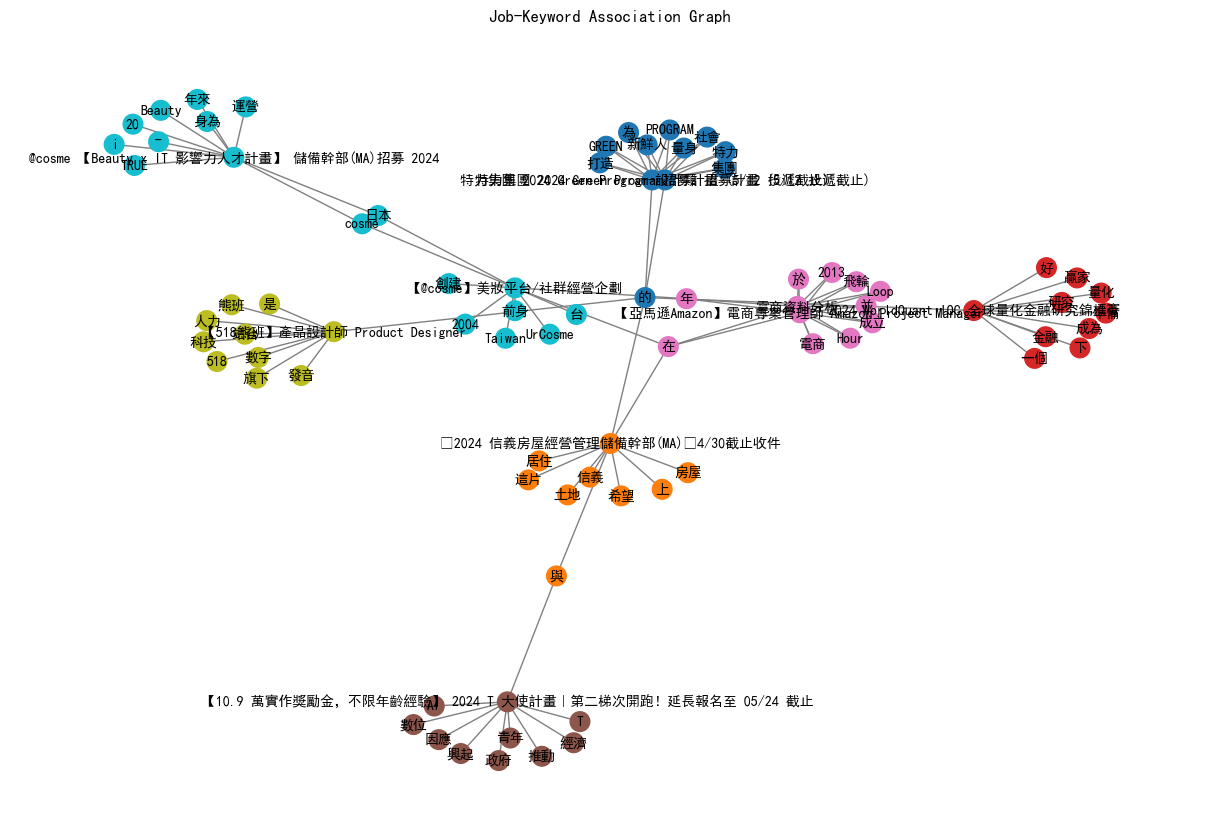

In [144]:
import matplotlib.pyplot as plt
import networkx as nx
from community import community_louvain

# Ë®≠ÂÆöÂ≠óÈ´î
plt.rcParams['font.sans-serif'] = ['SimHei']

# ÂâµÂª∫Á©∫ÁöÑÁÑ°ÈáèÂúñ
G = nx.Graph()

# Â¢ûÂä†Â∑•‰ΩúÁØÄÈªû
for job_data in job_data_list:
    G.add_node(job_data)

# Ê∑ªÂä†Â∑•‰ΩúËàáÈóúÈçµË©û‰πãÈñìÁöÑÈóú‰øÇ
for job_data, keywords in zip(job_data_list, job_data_description_keywords):
    for keyword in keywords.split():
        G.add_node(keyword)
        G.add_edge(job_data, keyword)

# ‰ΩøÁî® Louvain Á§æÁæ§Ê™¢Ê∏¨ÊºîÁÆóÊ≥ïÊâæÂá∫Á§æÁæ§ÁµêÊßã
partition = community_louvain.best_partition(G)

# Áπ™Ë£ΩÈóúËÅØÂúñ
plt.figure(figsize=(12, 8))

# ÂÆöÁæ©ÁØÄÈªûÈ°èËâ≤
node_colors = [partition[node] for node in G.nodes()]

# Áπ™Ë£ΩÂúñÂΩ¢
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_colors, cmap=plt.cm.tab10, font_size=10, font_weight='bold', edge_color='gray')

# È°ØÁ§∫ÈóúËÅØÂúñ
plt.title('Job-Keyword Association Graph')
plt.show()